In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #텐서플로우에서 제공하는 데이터셋 불러오기

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #컬럼지정

In [ ]:
train_images.shape
#셰잎 확인 

(60000, 28, 28)

In [ ]:
len(train_labels) 


60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape


(10000, 28, 28)

In [ ]:
len(test_labels)


10000

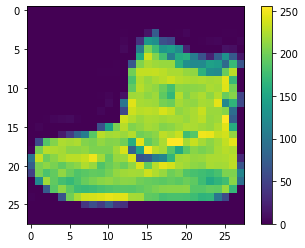

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#트레인 이미지에 대해서 보기 위함. 

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
#트레인 이미지와 테스트 이미지를 0~1사이로 보기 위해서 255로 나눠줌

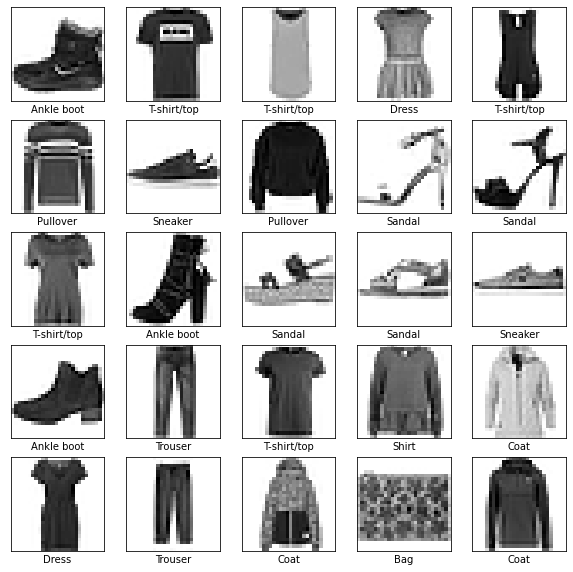

In [ ]:
plt.figure(figsize=(10,10)) #피겨사이즈는 10바이 10
for i in range(25): #스물다섯개의 이미지를 볼거임 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) #라벨은 어떻게 붙는지
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D #이 줄이 가장 중요함. 

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image


In [ ]:
# #MLP 작업중 
# model = tf.keras.models.Sequential([
#       tf.keras.layers.Flatten(input_shape=(28,28)),
#       tf.keras.layers.Dense(128, activation='relu'),
#       tf.keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential() 

model.add(Conv2D(32, #conv2D라는 라이브러리 이용해 레이어 추가  
                 kernel_size = (3,3), 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(Conv2D(64, #컨브레이어 하나 더 추가 
                 (3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25))

model.add(Flatten()) #추출된 피쳐 분류위해 플래튼 레이어 이용
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_images, #모델 학습하기 
         train_labels,
         batch_size=16,#8,16,32,64
         epochs=10,
         validation_split = 0.2) #트레인 이미지에 대해서 20프로는 밸리데이션으로 쓰겠다. 

Epoch 1/10
3000/3000 [==============================] - 21s 3ms/step - loss: 0.5027 - accuracy: 0.8208 - val_loss: 0.3114 - val_accuracy: 0.8912
Epoch 2/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3353 - accuracy: 0.8792 - val_loss: 0.2522 - val_accuracy: 0.9068
Epoch 3/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2862 - accuracy: 0.8953 - val_loss: 0.2361 - val_accuracy: 0.9098
Epoch 4/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2523 - accuracy: 0.9078 - val_loss: 0.2292 - val_accuracy: 0.9162
Epoch 5/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2323 - accuracy: 0.9139 - val_loss: 0.2260 - val_accuracy: 0.9194
Epoch 6/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.2219 - val_accuracy: 0.9227
Epoch 7/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1969 - accuracy: 0.9277 - val_loss: 0.2250 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
#테스트 이미지에 대해서 정확도 확인 적어도 92%의 정확도를 예측할 수 있다. 

313/313 - 1s - loss: 0.2734 - accuracy: 0.9217 - 983ms/epoch - 3ms/step

Test accuracy: 0.9217000007629395


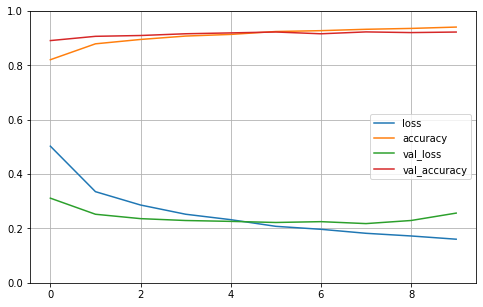

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.58078879e-15, 5.50862945e-19, 6.34698622e-16, 1.21530476e-17,
       3.03620978e-17, 3.95341052e-11, 5.65443917e-15, 2.71765110e-10,
       6.16696144e-15, 1.00000000e+00], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img): #이미지 그려보기 
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

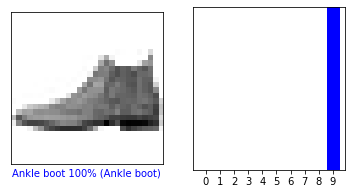

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

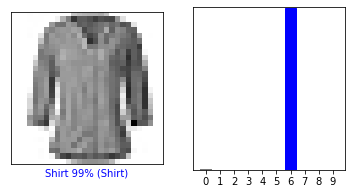

In [ ]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

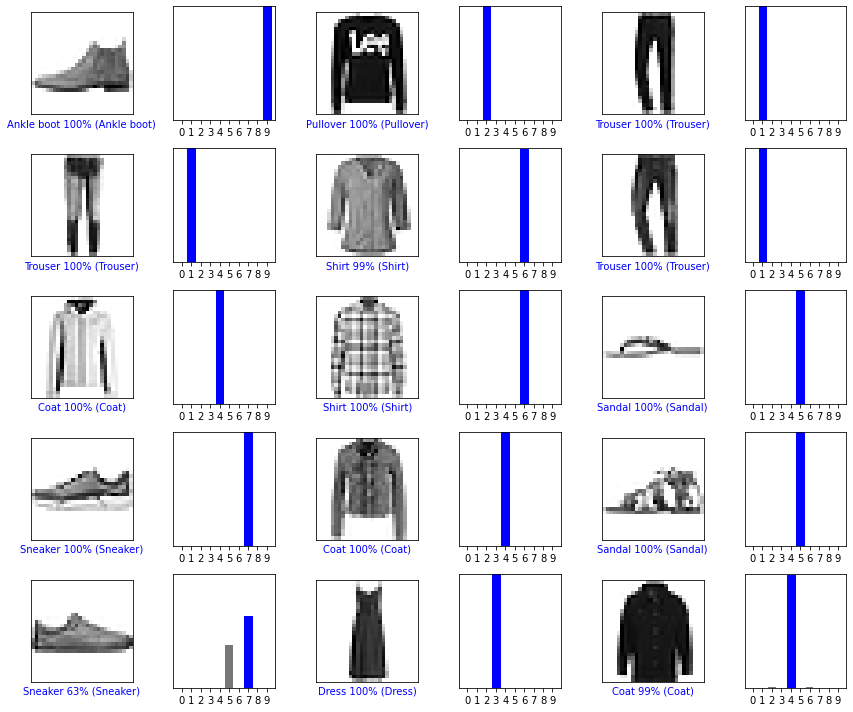

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#그림을 본 결과, 스니커는 좀 헷갈려하지만 다른 모델들은 100퍼센트로 맞춘다. 